# Exam Data Science 1 (2021 - 2022)

## General Information

Data source:
https://archive.ics.uci.edu/ml/datasets/student%2Bperformance

#### ***Personal Information***

First name: Ananya

Last name: Gyanmote

Student number: r0893265

#### ***Imports***

In [1]:
# put all your library imports here
import numpy as np
import pandas as pd
from random import randrange
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import random
import os
import math
from math import ceil
from scipy import stats
import matplotlib.mlab as mlab
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix

#### ***Data Assignment***

You need only use a selection of the original dataset. The variables have been grouped into several groups. You will use the *Basic* Group along with 2 other groups to predict G3.
Each group has been given a number.

The following script will assign you the numbers of the groups you will need to use in the assignment. Replace my personel number with your student number, and run the script **once**. After you have run the script, paste a screenshot below. This is of utmost importance, as the data assignment script uses random numbers.

Variable to predict:
+ G3

Basic:
+ school
+ sex
+ age
+ address
+ famsize

[1] Parents:
+ Medu
+ Fedu
+ Mjob
+ Fjob

[2] Surrounding: 
+ reason
+ nursery
+ internet

[3] Extra:
+ freetime
+ guardian
+ traveltime
+ studytime
+ failures

[4] Support:
+ schoolsup
+ famsup
+ paid

[5] Extra curricular:
+ activities
+ higher
+ romantic
+ famrel

[6] Relaxation:
+ goout
+ Dalc
+ Walc

[7] Health:
+ health
+ absences


In [2]:
studentnumber = "r0893265"

def stdnr_splitter(studentnumber):
	# decompose student number into interesting 
	cons_array = np.array(list(studentnumber))[2:].astype(int)
	indices = np.unique(cons_array)
	sum = round(np.sum(cons_array)/6)+1
	random = randrange(7)+1
	# interaction terms
	var1_index = int(round((sum*random)/7)+1)
	# quadratic terms
	var2a_index = int(round((sum/random)))
	var2b_index = int(round((randrange(10)+1)%var2a_index))
	print(f"Your groups are: {var1_index} and {var2a_index}")

stdnr_splitter(studentnumber)

Your groups are: 3 and 4


### Screenshot
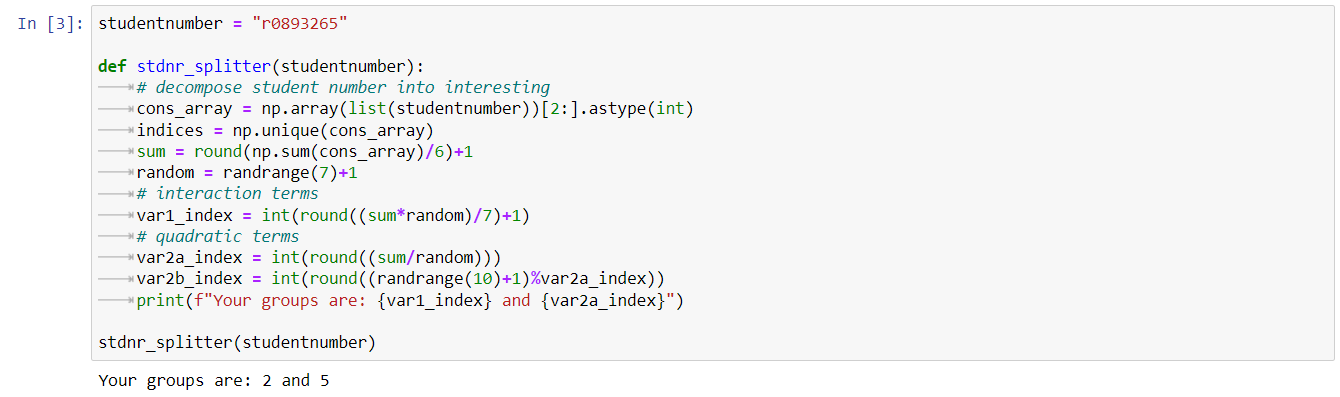

<!-- Uncomment this, and use the code below to paste your screenshot.
     Make absolutely sure you upload this screenshot, in the provided folder structure in your upload!
![data assignment screenshot](path/to/screenshot.png "Data Assignment")
-->

## Assignment

### Question 1: General

Welcome to the Data Science Fundamentals exam!

#### Question 1a

In this take-home exam, you will try and apply everything you have learned this semester to 1 dataset. The dataset you will be working with, is . As very first assignment, you load in the dataset here, and divide it over 2 dataframes: *X_df* and *Y_df*. The former should contain all the independent variables present in the dataset, while the latter contains all the dependent variables. 
Do so here:


In [3]:
# import data and divide over dataframes
df = pd.read_csv("student.csv")
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
108,GP,F,17,U,GT3,T,1,1,at_home,other,...,4,3,4,1,1,5,12,12,12,12
199,GP,M,15,U,GT3,T,4,4,health,health,...,5,4,2,1,1,5,0,11,12,12
294,GP,M,17,U,GT3,T,3,3,services,services,...,4,3,4,2,3,4,6,11,13,14
95,GP,F,17,R,GT3,T,2,2,other,other,...,5,3,2,1,2,3,21,13,13,13
53,GP,F,16,U,GT3,T,2,2,other,other,...,5,4,4,1,1,5,0,12,11,11


explain what you have done and why here

Over here we have a problem with data. We see that the data of students for two different subjects were merged, hence we have some columns with .x in their name while the other has .y. Where .x refers to data from subject 1 and .y indicates data from subject 2.
But there are some columns which remain the same for both the subjects for example: famsup (a boolean refering to family support).

The names of the columns are outputted below for further reference.

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y'],
      dtype='object')

All of the variables in Y_df are the ones we need to use to predict the variables in X_df.

#### Question 1b

**You are not permitted to use all variables in your analysis**.
Using the *Data Assignment* script above, you will receive the variables you are allowed to use.
Before you go any further, you should take a look at the variables that have been assigned to you. For these variables, you will add 1 quadratic term and 1 interaction term.

A Quadratic Term is a transformation of an existing variable. Let's say I have variable $x$ in my dataset, the quadratic term would then be $x^2$. Make the quadratic term that is asked from you by the *Data Assignment* script, and add it to the dataframe containing your independent variables. Note: when you add a quadratic term of a variable which is not yet in your dataframe, you also need to add the underlying variable to your dataframe! Otherwise, your analyses will not make any sense.

An Interaction Term is the multiplication of two existing terms. Let's say I have variables $x$ and $y$ in my dataset, the interaction term would then be $x*y$. Note: the same remark as with the quadratic term holds. The original terms also need to be present in your dataframe. If they are not in there yet, please add them!


Make a new dataframe, called *X_df_complete* in which you select the relevant dependent variables and add the Quadratic and Interaction Term. Do so here:

In [5]:
# make complete dataframe

# renaming some of the columns
df.rename(columns={"activities.x":"activities","higher.x":"higher","romantic.x":"romantic","famrel.x":"famrel", "G3.x":"G3"}, inplace=True)

# all the variables that are needed
all_Var = ["reason", "nursery", "internet", "activities", "higher", "romantic", "famrel", "school", "sex", "age", "address", "famsize", "G3"]

# Data Exploration & cleaning

In [6]:
# making dataframe with all the needed variables
s_df = df.loc[:, all_Var]
s_df.columns

Index(['reason', 'nursery', 'internet', 'activities', 'higher', 'romantic',
       'famrel', 'school', 'sex', 'age', 'address', 'famsize', 'G3'],
      dtype='object')

In [7]:
# checking the number of duplicates
s_df.duplicated().sum()

18

In [8]:
# Dropping all the duplicates
s_df = s_df.drop_duplicates()

# checking the number of duplicates
s_df.duplicated().sum()

0

In [9]:
# checking whether there are any null values
s_df.isnull().sum()

reason        0
nursery       0
internet      0
activities    0
higher        0
romantic      0
famrel        0
school        0
sex           0
age           0
address       0
famsize       0
G3            0
dtype: int64

In [10]:
# checking all the max and min values of the non-numerical values in the dataframe

print("Max and Min values of the non numerical columns")
for column in s_df.columns.tolist()[:]:
    if(str(s_df[column].min()).isnumeric() == False):
        print("{}: '{}' to '{}', \n dtype: {}\n"
              .format(column, s_df[column].min(), s_df[column].max(), s_df[column].dtype))

Max and Min values of the non numerical columns
reason: 'course' to 'reputation', 
 dtype: object

nursery: 'no' to 'yes', 
 dtype: object

internet: 'no' to 'yes', 
 dtype: object

activities: 'no' to 'yes', 
 dtype: object

higher: 'no' to 'yes', 
 dtype: object

romantic: 'no' to 'yes', 
 dtype: object

school: 'GP' to 'MS', 
 dtype: object

sex: 'F' to 'M', 
 dtype: object

address: 'R' to 'U', 
 dtype: object

famsize: 'GT3' to 'LE3', 
 dtype: object



In [11]:
# creating an array with all the variables 
ToCat = ['nursery', 'internet', 'activities', 'higher', 'romantic', 'famsize', 'address', 'sex', 'school', 'reason']
print('The unique values of the columns that can be converterted to Category are:\n')
for column in ToCat:
    print("{}: {}\n"
          .format(column, df[column].unique()))

The unique values of the columns that can be converterted to Category are:

nursery: ['yes' 'no']

internet: ['yes' 'no']

activities: ['yes' 'no']

higher: ['yes' 'no']

romantic: ['no' 'yes']

famsize: ['GT3' 'LE3']

address: ['R' 'U']

sex: ['F' 'M']

school: ['GP' 'MS']

reason: ['home' 'reputation' 'course' 'other']



In [12]:
# Converting to cat codes

for column in ToCat:
    s_df[column] = s_df[column].astype('category').cat.codes

### Reasons:
course preference => 0

close to home => 1

other => 2

school reputation => 3

### Nursery, Internet, Activities, Higher, Romantic:
yes => 1

no => 0

### Famsize:
Greater that 3 people => 0

Lesser than or equal to 3 people => 1

### Address:
Rural => 0

Urban => 1

### Sex:
Female => 0

Male => 1

### School:
Gabriel Pereira => 0

Mousinho da Silveira => 1

(array([35.,  0.,  8., 22., 54., 94., 53., 58., 22., 18.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

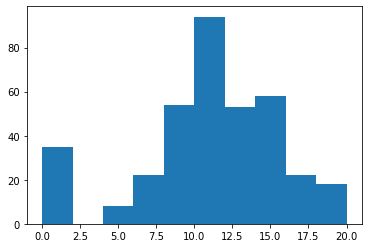

In [13]:
X_df = s_df.iloc[:,:-1]
Y_df = s_df.iloc[:,-1]
plt.hist(Y_df)

In [14]:
Y_df.describe()

count    364.000000
mean      10.461538
std        4.639174
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [15]:
print(f"most of the students have a score of: {statistics.mode(Y_df)}.")

most of the students have a score of: 10.


We see that most of the most of the students have a score of 10 but a couple of students did not attend the exam and got a zero as well.

#### Question 1c

What does the Interaction Term and the Quadratic Term signify? Investigate, illustrate with graphs, and report below:

In [16]:
## code exploring the interaction term

explanation and interpretation of the interaction term goes here


In [17]:
## code exploring the quadratic term

explanation and interpretation of the quadratic term goes here


#### Question 1d

Form your training and test set. Explain why you do this.

In [18]:
## code making the training and test set

X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size = 0.30)

explanation on training and test set goes here

The training set is used to create a model and the test set is used to make sure the training set doesn't fit in completely i.e., it is not personalised.
Here, I have 50% of the X_df and Y_df dataframe in X_test and Y_test sets and 50% is in X_train and Y_train.

# *Intermezzo*

Note the nice formatting we have used in Question 1. It is expected of you to do the same for Questions 2-5. Because I do not know exactly what you will do in each of these questions, I have not provided a blueprint of the solutions formatting.

### Question 2: Regression

You will note that the dependent variable is continuous. Perform a regression analysis. (Also experiment with the interaction & quadratic terms, and report on what happens). Be complete!

## Linear regression

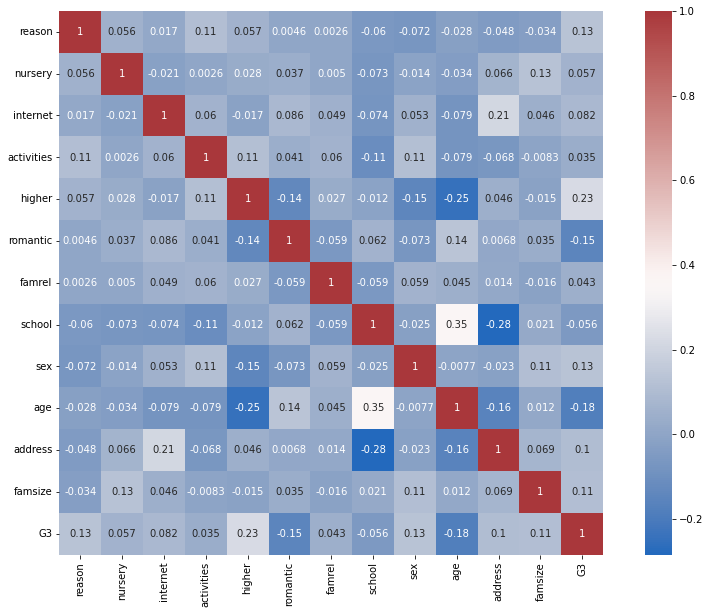

In [19]:
corrMatrix = s_df.corr()
plt.figure(figsize =(15 , 10))
colormap = sns.color_palette("vlag", as_cmap = True)
fig = sns.heatmap(corrMatrix , annot=True , square=True ,
cmap=colormap)

We see that the correlation between G3 and higher is the highest. Hence, we take G3 and higher to do further analysis.

C:\Users\ANANYA~1\AppData\Local\Temp/ipykernel_38760/3499727243.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, np.newaxis]


Text(0, 0.5, 'G3')

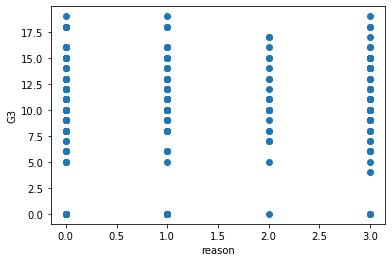

In [20]:
# have fun!
x = X_train.iloc[:,0]
X = x[:, np.newaxis]
y = Y_train
plt.plot(x, y, 'o')
plt.xlabel('reason')
plt.ylabel('G3')

C:\Users\ANANYA~1\AppData\Local\Temp/ipykernel_38760/4175789430.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, np.newaxis]


Intercept (Beta 0): 4.909090909090909
Slope (Beta 1): 5.675271230826786


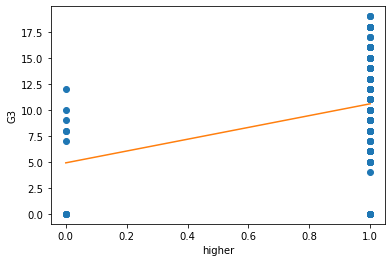

In [21]:
plt.figure()
x = X_train.loc[:,"higher"]
X = x[:, np.newaxis]
y = Y_train
regressor = LinearRegression()
regFit = regressor.fit(X, y)
print("Intercept (Beta 0): {}".format(regressor.intercept_))
print("Slope (Beta 1): {}".format(regressor.coef_[0]))
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_
plt.plot(X, y, 'o')
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.xlabel(X_train.columns[4])
plt.ylabel("G3")
plt.show()

In [22]:
x_test = X_test.loc[:,"higher"][:, np.newaxis]
x_train = X_train.loc[:,"higher"][:, np.newaxis]
x_test_ = X_test.loc[:,"higher"]
x_train_ = X_train.loc[:,"higher"]

C:\Users\ANANYA~1\AppData\Local\Temp/ipykernel_38760/2488706935.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test = X_test.loc[:,"higher"][:, np.newaxis]
C:\Users\ANANYA~1\AppData\Local\Temp/ipykernel_38760/2488706935.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train = X_train.loc[:,"higher"][:, np.newaxis]


In [23]:
y_predict_test = regressor.predict(x_test)
y_predict_train = regressor.predict(x_train)

In [24]:
headers_predict =["y_predict_test", "Y_test"]
data_predict = pd.DataFrame({'y_predict_test': y_predict_test, 'Y_test': Y_test.to_numpy()}, columns=headers_predict)
print(data_predict)

     y_predict_test  Y_test
0         10.584362       9
1         10.584362      10
2          4.909091       8
3         10.584362      10
4         10.584362      11
..              ...     ...
105       10.584362      13
106       10.584362      13
107       10.584362       8
108       10.584362       8
109       10.584362       8

[110 rows x 2 columns]


In [25]:
header_train =["y_predict_train", "Y_train"]
data_predict = pd.DataFrame({'y_predict_train': y_predict_train, 'Y_train': Y_train.to_numpy()}, columns=header_train)
print(data_predict)

     y_predict_train  Y_train
0          10.584362        9
1          10.584362       14
2          10.584362        0
3          10.584362       13
4          10.584362        8
..               ...      ...
249        10.584362       19
250         4.909091        9
251        10.584362       10
252        10.584362       11
253        10.584362        0

[254 rows x 2 columns]


In [26]:
regressor.score(X, y)

0.06028087186751163

In [27]:
## checking train set
print('R-2:', metrics.r2_score(Y_train, y_predict_train))

R-2: 0.06028087186751163


In [28]:
## evaluating on test set
print('R-2:', metrics.r2_score(Y_test, y_predict_test))

R-2: 0.018156399857276684


## Logistic regression

In [29]:
logisticRegr = LogisticRegression(multi_class='auto', max_iter=10000)
logisticRegr.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [30]:
Y_train_predictions = logisticRegr.predict(X_train)
Y_test_predictions = logisticRegr.predict(X_test)

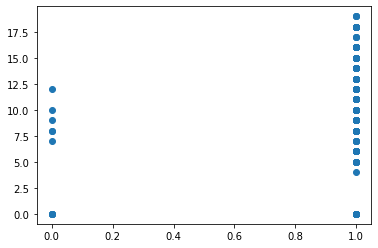

In [31]:
plt.scatter(X_train.loc[:,"higher"],Y_train)
plt.show()

In [32]:
## confusion matrix
confusion_matrix(Y_test, Y_test_predictions)

array([[3, 0, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [4, 0, 0, 0, 1, 1, 5, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 8, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 1, 3, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [33]:
headers_predict =["y_predict_test", "Y_test"]
data_predict = pd.DataFrame({'y_predict_test': Y_test_predictions, 'Y_test': Y_test.to_numpy()}, columns=headers_predict)
print(data_predict)

     y_predict_test  Y_test
0                15       9
1                15      10
2                 0       8
3                13      10
4                14      11
..              ...     ...
105              12      13
106              10      13
107              14       8
108               0       8
109              16       8

[110 rows x 2 columns]


In [34]:
header_train =["Y_train_predictions", "Y_train"]
data_predict = pd.DataFrame({'Y_train_predictions': Y_train_predictions, 'Y_train': Y_train.to_numpy()}, columns=header_train)
print(data_predict)

     Y_train_predictions  Y_train
0                      8        9
1                     14       14
2                      0        0
3                      8       13
4                     11        8
..                   ...      ...
249                   10       19
250                    0        9
251                   10       10
252                    0       11
253                    0        0

[254 rows x 2 columns]


In [35]:
score = logisticRegr.score(X_test, Y_test)
print(score)

0.14545454545454545


here our model is 10.90% accurate.

### Question 3: Classification

Though we know that the dependent variable is continuous, this does not by any means mean that we can't perform a classification analysis. Encode the dependent variables into several categories you find logical (report which ones and why), and perform a classification analysis on this encoded variable. (Once again, don't be too fast to omit the interaction & quadratic terms). Be complete!

## Decision Tree

In [36]:
# go go go go go!
tree = DecisionTreeClassifier()
tree_fit = tree.fit(X_train, Y_train)

In [37]:
predictions = tree.predict(X_test)

In [38]:
score = tree_fit.score(X_test, Y_test) 
print(score)

0.09090909090909091


Here our model is 6.3% accurate

In [39]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         9
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1
           8       0.12      0.08      0.10        13
           9       0.00      0.00      0.00         5
          10       0.25      0.19      0.21        16
          11       0.06      0.07      0.06        14
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         8
          14       0.15      0.22      0.18         9
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1

    accuracy              

C:\Users\Ananya Gyanmote\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ananya Gyanmote\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ananya Gyanmote\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[3 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [3 0 1 0 1 0 0 3 1 1 2 0 1 0 0 0 0]
 [0 0 1 0 0 0 2 1 0 1 0 0 0 0 0 0 0]
 [2 0 3 0 2 1 3 3 0 0 0 0 0 0 2 0 0]
 [0 1 1 0 0 0 0 1 2 1 2 1 3 1 1 0 0]
 [1 0 0 0 1 0 1 2 0 0 3 0 1 0 0 0 0]
 [0 0 1 0 1 0 1 3 0 0 0 0 1 1 0 0 0]
 [1 1 0 0 0 0 2 0 1 0 2 0 0 1 0 1 0]
 [1 0 0 0 0 0 1 2 0 2 1 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


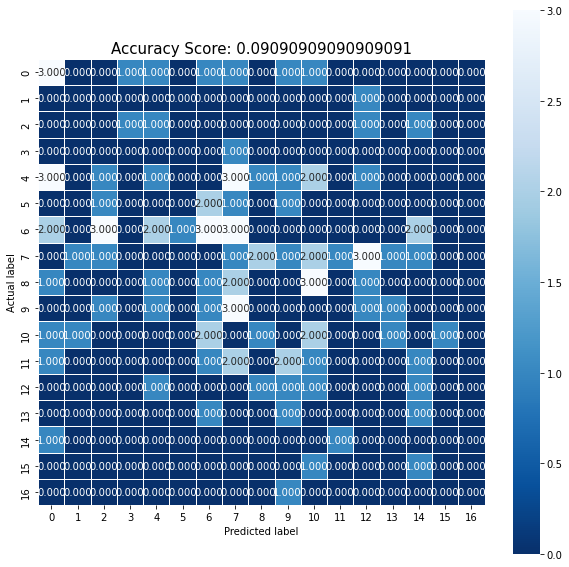

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Question 4: Clustering

Now we have analysed the dataset in a supervised manner, let's try and investigate whether this supervised dimension indeed offers additional information. Perform a cluster analysis on the dependent variables, and compare your predictive power with the models you have made in Question 2 and 3. Be complete!

In [42]:
# in the home stretch!

### Question 5: Conclusion

As always: report, conclude, illustrate.

In [43]:
# now onto the next exam! ;-)


The accuracy score of logistic regression is around 10% while for linear regression is 7% so it is better if we use logistic regression and our decision tree is 9% accurate.

From all of the research data above we see that most of the students who want to persue higher studies tend to study more and get higher scores in exams.
Our data model is 6% accurate though it is not much, it is the highest accuracy we can get out of all the elements given to test.